In [1]:
import numpy as np
import pandas as pd
import datetime
import operator
df = pd.read_csv('C:\\Vimal Anand\\loads_final.csv', parse_dates=["collection_date","delivery_date"])
#df = df[df.collection_longitude < -1.5]
#df = df[df.collection_longitude > -3.5]
#df = df[df.collection_latitude < 60]
#df = df[df.collection_latitude > 55]
#df = df[:100]
#df = df[df.collection_date > ('2015-10-06 11:00:00')]
X = np.array(list(zip(df['collection_longitude'], df['collection_latitude'])))
len(df)

81671

In [2]:
from sklearn.cluster import KMeans, MiniBatchKMeans
def k_means(X, n):
    # kmeans = KMeans(n_clusters=n)
    mbk = MiniBatchKMeans(n_clusters=n, batch_size=10000)
    # kmeans = kmeans.fit(X)
    mbk = mbk.fit(X)
    # labels = kmeans.predict(X)
    labels = mbk.predict(X)
    # C = kmeans.cluster_centers_
    C = mbk.cluster_centers_
    return C, mbk

centr, mb = k_means(X, 7)
d = {i: X[np.where(mb.labels_ == i)] for i in range(mb.n_clusters)}
d1 = {i: np.where(mb.labels_ == i)[0] for i in range(mb.n_clusters)}
# print(centr)
# print(d)
# print(d1)
import seaborn as sns
import matplotlib.pyplot as plt
k = d.keys()
v = list(d.values())
vids = list(d1.values())

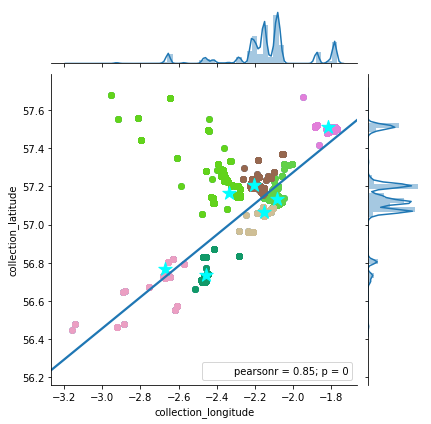

In [3]:
from random import randint
def ret_col():
    hello= ["1","2","3","4","5","6","7","8","9","a","b","c","e","d","f"]
    v="#"
    count=0
    for i in range(0,len(hello)):
        v=v+str(hello[randint(0,14)])
        count+=1
        if(count==6):
            #print(v)
            break
    return v

plt1 = sns.jointplot(x='collection_longitude', y='collection_latitude', data=df, kind='reg')
# col = ['yellow', 'green', 'red', 'blue', 'maroon', 'grey', 'black']
# col = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#0000ff", 'yellow', 'green', 'red', 'blue', 'maroon', 'grey', 'black']
for i in range(0, len(v)):
    plt1.ax_joint.scatter(v[i][:, 0], v[i][:, 1], color = ret_col())
plt.scatter(centr[:, 0], centr[:, 1], marker='*', s=200, c='aqua')

In [27]:
date_time11 = []
date_time21 = []
date_time31 = []
geo_loc =[]
for i in range(0, len(vids)):
    date_time1 = {}
    date_time2 = {}
    date_time3 = {}
    geo_loc1 = []
   # print(len(vids))
    for j in range(0, len(vids[i])):
        date_time1.update({vids[i][j]: [df['collection_longitude'].iloc[vids[i][j]], df['collection_latitude'].iloc[vids[i][j]]]})
        date_time2.update({vids[i][j]: df['delivery_date'].iloc[vids[i][j]]})
        date_time3.update({vids[i][j]: [df['delivery_date'].iloc[vids[i][j]], df['size'].iloc[vids[i][j]]]})
        geo_loc1.append(df['collection_longitude'].iloc[vids[i][j]])
        geo_loc1.append(df['collection_latitude'].iloc[vids[i][j]])
        geo_loc1.append(df['delivery_longitude'].iloc[vids[i][j]])
        geo_loc1.append(df['delivery_latitude'].iloc[vids[i][j]])
       # geo_loc1.append(df['collection_longitude'].iloc[vids[i][j]])
        #date_time1.append(df['collection_date'].iloc[vids[i][j]])
    date_time11.append(date_time1)
    date_time21.append(date_time2)
    date_time31.append(date_time3)
    geo_loc.append(geo_loc1)
# date_time
date_time_sorted1 = []
date_time_sorted2 = []
date_time_sorted3 = []
geo_loc_sorted=[]
for diction in date_time11:
    sorted_x = sorted(diction.items(), key=operator.itemgetter(1))
    date_time_sorted1.append(sorted_x)
for diction in date_time21:
    sorted_y = sorted(diction.items(), key=operator.itemgetter(1))
    date_time_sorted2.append(sorted_y)
for diction in date_time31:
    sorted_z = sorted(diction.items(), key=operator.itemgetter(1))
    date_time_sorted3.append(sorted_z)

In [28]:
c=[]
b=[]
for i in date_time_sorted3:
    e={}
    for j in i:
        key = j[1][0]
       # print(key)
        if key not in e:
               e[key]=[]
        e[key].append(j[1][1])
    c.append(e)
#c
for diction in c:
    sorted_x = sorted(diction.items(), key=operator.itemgetter(0))
    #print(len(sorted_x))
    b.append(sorted_x)
    
g=[]
for i in range(0,len(date_time_sorted3)):
    for j in range(0,len(b[i])):
        g.append(b[i][j][1])
len(g)

11805

In [29]:
class Bin(object):
    """ Container for items that keeps a running sum """
    def __init__(self):
        self.items = []
        self.sum = 0

    def append(self, item):
        self.items.append(item)
        self.sum += item

    def __str__(self):
        """ Printable representation """
        return '(items=%s)' % (str(self.items))

def bestFitDecreasing(values, maxValue):
    values = sorted(values, reverse=True)
    bins = []

    for item in values:
        # Try to fit item into a bin
        for bin in bins:
            if bin.sum + item <= maxValue:
                #print 'Adding', item, 'to', bin
                bin.append(item)
                break
        else:
            # item didn't fit into any bin, start a new bin
            #print 'Making new bin for', item
            bin = Bin()
            bin.append(item)
            bins.append(bin)

    return len(bins)

In [30]:
class Bin(object):
    """ Container for items that keeps a running sum """
    def __init__(self):
        self.items = []
        self.sum = 0

    def append(self, item):
        self.items.append(item)
        self.sum += item

    def __str__(self):
        """ Printable representation """
        return '(items=%s)' % (str(self.items))


def pack(values, maxValue):
    values = sorted(values, reverse=True)
    bins = []

    for item in values:
        # Try to fit item into a bin
        for bin in bins:
            if bin.sum + item <= maxValue:
                #print 'Adding', item, 'to', bin
                bin.append(item)
                break
        else:
            # item didn't fit into any bin, start a new bin
            #print 'Making new bin for', item
            bin = Bin()
            bin.append(item)
            bins.append(bin)

    return bins


if __name__ == '__main__':
    import random

    def packAndShow(aList, maxValue):
        """ Pack a list into bins and show the result """
        #print ('List with sum', sum(aList), 'requires at least', (sum(aList)+maxValue-1)/maxValue, 'bins'0

        bins = pack(aList, maxValue)

        print ('Total Bins', len(bins), 'bins:')
        for bin in bins:
            print (bin)

        print


    #aList = [10,9,8,7,6,5,4,3,2,1]
    #packAndShow(aList, 11)

    #aList = [ random.randint(1, 11) for i in range(100) ]
    #packAndShow(aList, 11)  

In [31]:
n=0
for i in range(0,len(g)):
    aList= g[i]
    n+=bestFitDecreasing(aList,1)
n

53542

In [9]:
### another way to do the same ###

In [32]:
l = []
for i in date_time_sorted2:
    d = {}
    for j in i:
        key = j[1]
        d.setdefault(key, []).append(j[0])
    l.append(d)
# print(l)
ctr = 0
for i in range(len(l)):
    #print('new location cluster')
    ctr += 1
    for j in l[i]:
        #print('new time cluster')
        ctr += 1
        #print(l[i][j])
        for k in range(len(l[i][j])):
            ctr += 1
#             print(l[i][j][k])
#             pass
print(ctr)

li = []
for i in l:
    sorted_i = sorted(i.items(), key=operator.itemgetter(0))
    li.append(sorted_i)

93483


In [33]:
d = []
for i in li:
    d1 = []
    for j in i:
        temp = j[1]
        d2 = []
        for k in j[1]:
            d2.append(df['size'].iloc[k])
        d1.append(d2)
    d.append(d1)
#print(d)
bins = 0
for i in d:
    for j in i:
        # print(j)
        bins += bestFitDecreasing(j,1)
print(bins)

53542


In [34]:
from __future__ import division

def checkClass(k, a):
    for i in range(k, 1, -1):
        if (a > (1.0/i) and a <= (1.0/(i-1))):
            clas = (i-1)
            break
        else:
            clas = k
    return (clas-1)

def nextFit(weight, n, c):
    res = 1
    bin_rem = c
    for i in range(0, n):
        if (weight[i] > bin_rem):
            res = res + 1
            bin_rem = c - weight[i]
        else:
            bin_rem = bin_rem - weight[i]
    return res

def harmonic(items_normal, cap, k):
    items = [i/cap for i in items_normal]
    bins_k = [] #items divided n classes, list of list
    res_k = [] #bins required in every class
    for i in range(0, k):
        classes = [] #single list
        bins_k.append(classes)
    for item in items:
        clas = checkClass(k, item)
        bins_k[clas].append(item)
    for classes in bins_k:
        if (len(classes) != 0):
            bins = nextFit(classes, len(classes), 1)
        else:
            bins = 0
        res_k.append(bins)
        #print(classes)
    res = 0
    #print(bins_k)
    for i in bins_k:
        print(len(i))
    for r in res_k:
        res = res + r
    print(res_k)
    return res

In [26]:
bins=0
for i in d:
    for j in i:
        # print(j)
        bins += harmonic(j,1,4)
print(bins)

4
2
0
0
[4, 1, 0, 0]
0
0
0
4
[0, 0, 0, 1]
0
0
0
24
[0, 0, 0, 4]
2
4
9
7
[2, 2, 3, 1]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
6
0
[0, 1, 2, 0]
0
0
0
5
[0, 0, 0, 1]
1
4
12
15
[1, 2, 4, 2]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
0
0
33
9
[0, 0, 11, 2]
0
0
0
9
[0, 0, 0, 2]
2
2
0
16
[2, 1, 0, 1]
1
0
0
0
[1, 0, 0, 0]
0
0
0
16
[0, 0, 0, 1]
0
0
0
16
[0, 0, 0, 1]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
27
[0, 0, 0, 6]
2
0
0
0
[2, 0, 0, 0]
3
2
3
9
[3, 1, 1, 3]
1
0
0
0
[1, 0, 0, 0]
0
0
3
5
[0, 0, 1, 1]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
2
0
0
14
[2, 0, 0, 3]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
3


15
0
0
18
[15, 0, 0, 5]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
19
0
0
0
[19, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
24
34
[2, 0, 8, 5]
2
4
3
0
[2, 2, 1, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
10
0
0
0
[10, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
2
0
34
[2, 1, 0, 6]
20
0
0
0
[20, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0

2
0
0
0
[2, 0, 0, 0]
4
0
0
5
[4, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
2
3
0
[1, 1, 1, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
24
0
0
0
[24, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
35
0
0
0
[35, 0, 0, 0]
2
0
12
0
[2, 0, 4, 0]
10
0
12
0
[10, 0, 4, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
20
[0, 0, 0, 4]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
4
0
0
[1, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
26
0
0
0
[26, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2


[1, 0, 0, 0]
4
2
0
4
[4, 1, 0, 1]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
27
0
[1, 0, 9, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
0
2
0
5
[0, 1, 0, 1]
0
18
58
5
[0, 9, 20, 1]
2
0
17
0
[2, 0, 6, 0]
2
4
0
0
[2, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
10
0
0
0
[10, 0, 0, 0]
2
0
3
0
[2, 0, 1, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
3
0
0
34
[3, 0, 0, 9]
2
2
0
0
[2, 1, 0, 0]
2
2
3
0
[2, 1, 1, 0]
1
0
0
0
[1, 0, 0, 0]
0
21
3
0
[0, 11, 1, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
4
0
0
[1, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
0
0
20
[0, 0, 0, 4]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
8
0
12
5
[8, 0, 4, 1]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
3
0
3
0
[3, 0, 1, 0]
1
2
0
0
[

[9, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
12
6
0
[1, 6, 2, 0]
7
12
3
0
[7, 6, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
14
0
[0, 0, 5, 0]
1
0
0
0
[1, 0, 0, 0]
3
12
11
0
[3, 6, 4, 0]
1
0
0
0
[1, 0, 0, 0]
10
0
0
0
[10, 0, 0, 0]
2
0
3
0
[2, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
10
0
0
0
[10, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
3
2
55
0
[3, 1, 19, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
3
0
[1, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
11
0
[0, 0, 4, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
8
0
0
0
[8, 0, 0, 0]
1
0
3
28
[1, 0, 1, 7]
4
2
3
5
[4, 1, 1, 1]
2
0
0
0
[2, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
3
2
56
0
[3, 1, 19, 0]
2
2
0
0
[2, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
8
0
0
[2, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
8
4
0
4
[8, 2, 0, 1]
1
0
12
5
[1, 0, 4, 1]
1
0
12
0
[1, 0, 4, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
3
0
[2, 0, 1, 0]
4
0
0
0
[4, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
2
0


0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
0
4
0
36
[0, 2, 0, 6]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
10
0
0
[1, 5, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
16
[0, 1, 0, 4]
2
0
3
0
[2, 0, 1, 0]
10
2
0
0
[10, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
4
2
0
0
[4, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
7
0
3
0
[7, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
3
0
[1, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
2
0
4
[3, 1, 0, 1]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
3
4
[1, 0, 1, 1]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
6
[2, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
8
3
4
[2, 4, 1, 1]
11
0
0
5
[11, 0, 0, 1]
0
4
0
0
[0, 2, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 

0
[1, 0, 0, 0]
19
7
0
4
[19, 4, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
5
0
17
[1, 3, 0, 5]
1
0
0
0
[1, 0, 0, 0]
0
0
0
18
[0, 0, 0, 5]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
2
0
0
[3, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
12
[1, 0, 0, 2]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
3
0
[1, 0, 1, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
4
6
0
[2, 2, 2, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
1
0
6
0
[1, 0, 2, 0]
1
0
0
0
[1, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
6
0
3
27
[6, 0, 1, 4]
0
10
0
0
[0, 5, 0, 0]
5
0
3
0
[5, 0, 1, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
12
[2, 0, 0, 2]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
10
0
0
[0, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[

0
22
[0, 3, 0, 5]
3
14
6
10
[3, 7, 2, 2]
1
0
0
5
[1, 0, 0, 1]
5
0
0
4
[5, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
25
8
0
0
[25, 4, 0, 0]
6
0
0
0
[6, 0, 0, 0]
3
40
0
0
[3, 20, 0, 0]
0
0
0
4
[0, 0, 0, 1]
1
0
0
34
[1, 0, 0, 7]
0
0
3
0
[0, 0, 1, 0]
0
0
0
18
[0, 0, 0, 5]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
4
0
0
[3, 2, 0, 0]
12
0
0
0
[12, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
4
[1, 0, 0, 1]
4
0
0
0
[4, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
3
0
[3, 0, 1, 0]
6
2
0
0
[6, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
6
0
0
[1, 3, 0, 0]
2
0
0
0
[2, 0, 0, 0]
3
2
0
0
[3, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
47
0
[1, 0, 16, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
3
8
3
50
[3, 4, 1, 9]
1
0
0
0
[1, 0, 0, 0]
0
0
0
15
[0, 0, 0, 3]
0
0
0
10
[0, 0, 0, 2]
1

0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
39
[0, 0, 0, 10]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
2
0
0
[5, 1, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
3
0
[1, 0, 1, 0]
2
2
0
0
[2, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 

2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
4
0
0
[1, 2, 0, 0]
1
4
0
0
[1, 2, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
2
0
0
[1, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
12
0
0
0
[12, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0

0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
2
0
0
[4, 1, 0, 0]
1
0
3
0
[1, 0, 1, 0]
5
8
0
0
[5, 4, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
14
0
0
[0, 7, 0, 0]
7
2
0
0
[7, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
24
0
0
0
[24, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
10
0
0
[2, 5, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
2
0
0
[4, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
0
0
6
0
[0, 0, 2, 0]
1
4
0
0
[1, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
2
0
0
[1,

1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
4
0
0
[0, 2, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
4
0
4
[2, 2, 0, 1]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
90
[1, 0, 0, 12]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
4
0
0
[0, 2, 0, 0]
5
2
0
0
[5, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
28
0
0
[0, 14, 0, 0]
2
2
0
0
[2, 1, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
43
2
0
0
[43, 1, 0, 0]
7
0
0
0
[7, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
1
4
0
0

1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
70
2
0
0
[70, 1, 0, 0]
3
0
0
0
[3, 0, 0, 0]
3
4
0
0
[3, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
6
0
0
[1, 3, 0, 0]
2
6
0
0
[2, 3, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
2
0
0
[3, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
6
0
0
0
[6, 0, 0, 0]
2
4
0
0
[2, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
6
4
0
0
[6, 2, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
8
2
0
0
[8, 1, 0, 0]
77
0
0
0
[77, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
4
0
0
[3, 2, 0, 0]
50
0
0
0


[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
6
0
0
0
[6, 0, 0, 0]
0
4
0
0
[0, 2, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
4
0
0
[1, 2, 0, 0]
0
4
3
0
[0, 2, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
0
4
0
0
[0, 2, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
4
0
0
[1, 2, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
11
0
0
0
[11, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
288
0
0
0
[288, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
2
0
0
[1, 1, 0, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 

[1, 1, 0, 0]
1
2
3
0
[1, 1, 1, 0]
10
8
0
0
[10, 4, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
2
0
0
[1, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
3
8
[1, 0, 1, 1]
63
0
0
0
[63, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
50
0
0
0
[50, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
8
0
0
0
[8, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
7
4
0
0
[7, 2, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
4
0
0
[0, 2, 0, 0]
3
4
0
0
[3, 2, 0, 0]
2
0
0
6
[2, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
2
3
0
[1, 1, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
36
0
0
0
[36, 0, 0, 0]
12
0
0
0
[12, 0, 0, 0]
1
0
0
0
[1,

0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
44
0
0
[0, 22, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
11
52
0
[0, 6, 18, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
44
0
0
[0, 22, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
22
0
0
[0, 11, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
14
0
[0, 0, 5, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
70
0
0


0
[0, 0, 19, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
9
[1, 0, 0, 3]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
3
0
[1, 0, 1, 0]
0
0
12
0
[0, 0, 4, 0]
7
0
0
0
[7, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
29
2
0
0
[29, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
2
0
0
[5, 1, 0, 0]
5
0
0
60
[5, 0, 0, 13]
2
0
0
0
[2, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
0
15
0
9
[0, 8, 0, 3]
0
0
0
18
[0, 0, 0, 5]
8
0
0
0
[8, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
30
0
[1, 0, 10, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
14
0
[1, 0, 5, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
12
0
[0, 0, 4, 0]
1
0
14
0
[1, 0, 5, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
6
[0, 0, 0, 1]
0
0
0
30
[0, 0, 0, 5]
0
0
0
15
[0, 0, 0, 3]
3
0
6
15
[3, 0, 2, 3]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
4
[1, 0, 0, 1]
2
0
0
0
[2, 0, 0, 0]
1
0

0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
24
0
0
[0, 12, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
36
[1, 0, 0, 9]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
8
[2, 0, 0, 2]
0
4
0
0
[0, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
3
0
0
0
[3, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
0
2
0
0
[0, 1, 0, 0]
6
0
0
0
[6, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
13
0
0
0
[13, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
3
2
0
0
[3, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1,

0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
3
0
[0, 1, 1, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
5
[5, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
18
0
0
0
[18, 0, 0, 0]
0
5
3
18
[0, 3, 1, 5]
0
0
0
9
[0, 0, 0, 3]
1
0
0
0
[1, 0, 0, 0]
0
0
0
6
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
0
8
[0, 0, 0, 2]
1
0
0
0
[1, 0, 0, 0]
5
0
0
8
[5, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
2
2
0
0
[2, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
5
2
3
0
[5, 1, 1, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
0
106
[0, 0, 0, 27]
2
0
0
0
[2, 0, 0, 0]
0
0
30
0
[0, 0, 10, 0]
0
0
0
9
[0, 0, 0, 3]
1
8
0
0
[1, 4, 0, 0]
0
0
0
9
[0, 0, 0, 3]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
56
0
[1, 1, 19, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
14
0
[0, 0, 5, 0]
1
0
0


0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
6
0
[1, 0, 2, 0]
2
0
0
0
[2, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
3
36
0
0
[3, 18, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
14
0
[1, 0, 5, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
3
0
[1, 0, 1, 0]
7
0
0
0
[7, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
11
0
0
0
[11, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
3
0
0
0
[3, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
2
0
0
[5, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
5
[2, 0, 0, 1]
1
2
0
0
[1, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
60
0
[0, 0, 20, 0]
4
0
0
0
[4, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
0
20
0
0

0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
3
0
[2, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
10
0
0
[2, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
10
0
0
0
[10, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
27
0
[1, 0, 9, 0]
2
0
0
0
[2, 0, 0, 0]
12
0
0
0
[12, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
8
0
0
[0, 4, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
14
0
[1, 0, 5, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
10
0
0
0
[10, 0, 0, 0]
1
0
0

1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
12
0
0
[4, 6, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
8
0
0
[0, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
0
0
0
6
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
9
2
0
0
[9, 1, 0, 0]
26
18
0
0
[26, 9, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
29
0
0
0
[29, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
21
0
0
[0, 11, 0, 0]
5
0
0
0
[5, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
12
0
[1, 0, 4, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
3
0
[1, 0, 1, 0]
1
0
3
0
[1, 0, 1, 0]
1
2
0
0
[1, 1, 0, 0]
1
6
0
0
[1, 3, 0, 0]
16
0

1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
3
22
[2, 0, 1, 3]
1
2
0
0
[1, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
44
0
0
[2, 22, 0, 0]
1
2
0
0
[1, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
5
0
0
0
[5, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
21
0
0
[0, 11, 0, 0]
1
0
0
0
[1, 0, 0, 0]
21
0
0
0
[21, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
14
0
[0, 0, 5, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
46
[1, 0, 0, 12]
0
2
12
0
[0, 1, 4, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
0
0
0
69
[0, 0, 0, 18]
4
0
0
0
[4, 0, 0, 0]
0
0
0
18
[0, 0, 0, 5]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
0
0
42
[0, 0, 0, 11]
1
0
0
0
[1, 0, 0,

[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
64
[1, 0, 0, 16]
0
0
0
16
[0, 0, 0, 4]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
24
0
[0, 1, 8, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
52
0
[0, 0, 18, 0]
0
0
13
0
[0, 0, 5, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0,

[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
56
0
[0, 0, 19, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
4
2
0
0
[4, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
8
0
0
0
[8, 0, 0, 0]
16
0
0
0
[16, 0, 0, 0]
12
0
0
0
[12, 0, 0, 0]
1
0
3
0
[1, 0, 1, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
11
2
0
0
[11, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
10
[0, 0, 0, 2]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 

0
[18, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
18
0
0
[0, 9, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
107
0
0
0
[107, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
18
0
0
[0, 9, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
1
0
0
0
[1, 0, 0, 0]
110
0
0
0
[110, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
22
0
0
0
[22, 0, 0, 0]
64
0
0
0
[64, 0, 0, 0]
0
10
0
0
[0, 5, 0, 0]
8
0
0
0
[8, 0, 0, 0]
9
0
0
0
[9, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
67
0
0
0
[67, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
9
0
0
0
[9, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
0
33
0
[0, 0, 11, 0]
0
0
0
8
[0, 0, 0, 2

0
[1, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
8
3
0
[0, 4, 1, 0]
0
8
0
0
[0, 4, 0, 0]
4
0
0
0
[4, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
14
0
[1, 0, 5, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
0
0
0
[6, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
56
0
[1, 0, 19, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
11
0
0
0
[11, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
6
8
0
0
[6, 4, 0, 0]
0
2
0
0
[0, 1, 0, 0]
7
8
0
0
[7, 4, 0, 0]
1
0
0
0
[1, 0, 0, 0]
30
0
0
0
[30, 0, 0, 0]
0
0
14
0
[0, 0, 5, 0]
6
0
12
0
[6, 0, 4, 0]
4
0
0
0
[4, 0, 0, 0]
0
0
6
0
[0, 0, 2, 0]
1
0
0
0
[1, 0, 0, 0]
25
0
0
0
[25, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
0
24
0
0
[0, 12, 0, 0]
25
0
0
0
[25, 0, 0, 0]
3
0
0
0
[3, 0, 0, 0]
0
21

0
0
[1, 0, 0, 0]
18
0
0
0
[18, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
8
0
0
0
[8, 0, 0, 0]
18
0
0
0
[18, 0, 0, 0]
0
32
0
0
[0, 16, 0, 0]
0
2
0
0
[0, 1, 0, 0]
30
0
0
0
[30, 0, 0, 0]
7
0
0
0
[7, 0, 0, 0]
15
0
0
0
[15, 0, 0, 0]
0
70
0
0
[0, 35, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
6
[1, 0, 0, 1]
1
0
0
0
[1, 0, 0, 0]
0
50
0
0
[0, 25, 0, 0]
25
0
3
0
[25, 0, 1, 0]
4
0
0
0
[4, 0, 0, 0]
2
0
0
0
[2, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
0
10
0
0
[0, 5, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
32
0
0
[1, 16, 0, 0]
0
8
0
0
[0, 4, 0, 0]
2
40
0
0
[2, 20, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
24
3
0
[0, 12, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
2
0
0
[1, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
21
0
0
[0, 11, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
3
0
[0, 0, 1, 0]
0
2
27
0
[0, 

0
0
[0, 9, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
0
27
[0, 0, 0, 4]
1
0
0
0
[1, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
2
0
0
0
[2, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
0
12
0
[0, 0, 4, 0]
0
34
0
0
[0, 17, 0, 0]
0
102
0
0
[0, 51, 0, 0]
0
273
0
0
[0, 137, 0, 0]
0
34
0
0
[0, 17, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
1
4
0
0
[1, 2, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
128
0
0
0
[128, 0, 0, 0]
0
0
0
4
[0, 0, 0, 1]
0
2
0
0
[0, 1, 0, 0]
128
0
0
0
[128, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
4
2
0
0
[4, 1, 0, 0]
0
0
3
0
[0, 0, 1, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
123
2
0
0
[123, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
11
0
0
0
[11, 0, 0, 0]
11
0
0
0
[11, 0, 0, 0]
11
0
0
0
[11, 0, 0, 0]
4
0
0
0
[4, 0, 0, 0]
0
2
0
0
[0, 1, 0, 0]
0
2
0
0
[0, 1, 0, 0]
1
0
0
0
[1, 0, 0, 0]
10
0
0
0
[10, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
0
0
[1, 0, 0, 0]
1
0
